# Ejercicio 8

Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data

Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026
- https://pingouin-stats.org/build/html/index.html
- https://doi.org/10.21105/joss.01026

In [20]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [21]:
# Import the file
path= "C:\\Users\\ebert\\OneDrive - Universidad Autónoma del Carmen\\Curso de Ciencia de Datos\\Curso de Python\\Bases de datos\\Terminos_lagoon_TA_DIC_2023_RawData.csv"
df = import_csv(path)

In [22]:
print(df.columns)

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')


In [23]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

In [24]:
import scikit_posthocs as sp
# You need to install the scikit-posthocs package: conda install -c conda-forge scikit-posthocs

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

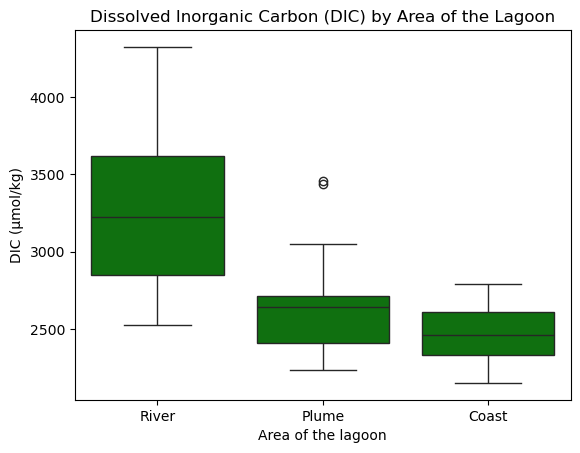

In [25]:
# Plot ta values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='dic_micromol_kg', data=df, color='green')
plt.xlabel('Area of the lagoon')
plt.ylabel('DIC (μmol/kg)')
plt.title('Dissolved Inorganic Carbon (DIC) by Area of the Lagoon')
plt.show()

In [26]:
# Select the data for each area of the lagoon
dic_river = df[df['area'] == 'River']['dic_micromol_kg']
dic_plume = df[df['area'] == 'Plume']['dic_micromol_kg']
dic_coast = df[df['area'] == 'Coast']['dic_micromol_kg']

In [27]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [28]:
dunn_posthoc(df, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


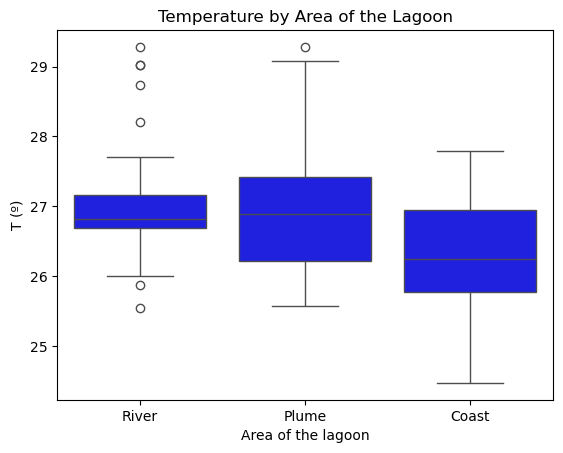

In [29]:
# Plot ta values for each area of the lagoon using seaborn

sns.boxplot(x='area', y='temp_c', data=df, color='blue')
plt.xlabel('Area of the lagoon')
plt.ylabel('T (º)')
plt.title('Temperature by Area of the Lagoon')
plt.show()

In [30]:
# Select the data for each area of the lagoon
t_river = df[df['area'] == 'River']['temp_c']
t_plume = df[df['area'] == 'Plume']['temp_c']
t_coast = df[df['area'] == 'Coast']['temp_c']

In [31]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(t_river, t_plume, t_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [32]:
dunn_posthoc(df, 'area', 'temp_c')

          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000
